# Linear & Non-Linear Models
### Assignment #5 - Survival Analysis
### Luke Schwenke
### February 22, 2023

### Part A

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter

In [33]:
# Read data
df = pd.read_csv('cancer.csv')

# Replace NAs with the mean of each column
df = df.fillna(df.mean())

In [16]:
df.status.dtype

dtype('int64')

In [35]:
# Create dead indicator
df['dead'] = np.where(df['status'] == 2, 1, 0) # If Status = 2, then dead (1), else alive (0)
df.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.000000,9.831776,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.000000,15.000000,1
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,928.779006,15.000000,0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.000000,11.000000,1
4,5,1.0,883,2,60,1,0.0,100.0,90.0,928.779006,0.000000,1


**Fit Kaplan-Meier Method on time and dead columns and plot Survival function**

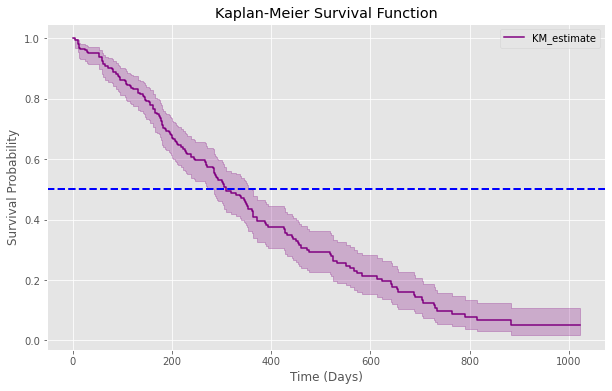

In [38]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df['time'], df['dead'])

# Add plot style
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the function
kmf.plot(color='purple', linestyle='-')
plt.title('Kaplan-Meier Survival Function')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')

# Add reference line for 50% survival probability
plt.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)

# Show the plot
plt.show()

### Part B

**Median Survival time and Kaplan-Meier estimates (timeline vs. k-m Estimate)**

In [59]:
print('KMF Median Survival Time:', kmf.median_survival_time_, 'days')

KMF Median Survival Time: 310.0 days


### Part C

In [43]:
# Timeline
print(np.linspace(0, df['time'].max(), num=100))

[   0.           10.32323232   20.64646465   30.96969697   41.29292929
   51.61616162   61.93939394   72.26262626   82.58585859   92.90909091
  103.23232323  113.55555556  123.87878788  134.2020202   144.52525253
  154.84848485  165.17171717  175.49494949  185.81818182  196.14141414
  206.46464646  216.78787879  227.11111111  237.43434343  247.75757576
  258.08080808  268.4040404   278.72727273  289.05050505  299.37373737
  309.6969697   320.02020202  330.34343434  340.66666667  350.98989899
  361.31313131  371.63636364  381.95959596  392.28282828  402.60606061
  412.92929293  423.25252525  433.57575758  443.8989899   454.22222222
  464.54545455  474.86868687  485.19191919  495.51515152  505.83838384
  516.16161616  526.48484848  536.80808081  547.13131313  557.45454545
  567.77777778  578.1010101   588.42424242  598.74747475  609.07070707
  619.39393939  629.71717172  640.04040404  650.36363636  660.68686869
  671.01010101  681.33333333  691.65656566  701.97979798  712.3030303
  722.6

In [41]:
# Kaplan-Meier Estimates
print(kmf.survival_function_.to_string())

          KM_estimate
timeline             
0.0          1.000000
5.0          0.995614
11.0         0.982456
12.0         0.978070
13.0         0.969298
15.0         0.964912
26.0         0.960526
30.0         0.956140
31.0         0.951754
53.0         0.942982
54.0         0.938596
59.0         0.934211
60.0         0.925439
61.0         0.921053
62.0         0.916667
65.0         0.907895
71.0         0.903509
79.0         0.899123
81.0         0.890351
88.0         0.881579
92.0         0.877193
93.0         0.872785
95.0         0.863969
105.0        0.859561
107.0        0.850700
110.0        0.846269
116.0        0.841838
118.0        0.837407
122.0        0.832977
131.0        0.828546
132.0        0.819684
135.0        0.815254
142.0        0.810823
144.0        0.806392
145.0        0.797531
147.0        0.793100
153.0        0.788669
156.0        0.779808
163.0        0.766516
166.0        0.757654
167.0        0.753224
170.0        0.748793
173.0        0.748793
174.0     

### Part D

**Survival Function by Gender Plot**

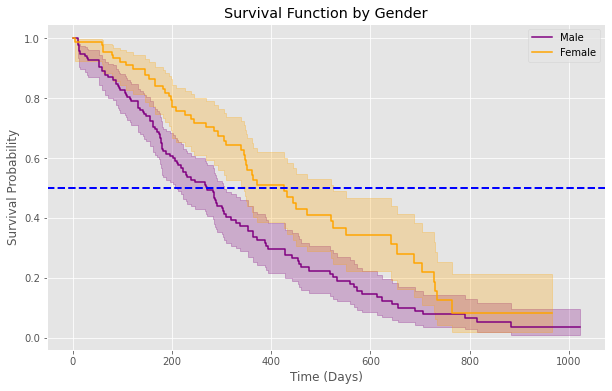

In [48]:
# Create a combined plot for male and female groups
kmf_male = KaplanMeierFitter()
kmf_male.fit(df.loc[df['sex']==1, 'time'], 
             event_observed=df.loc[df['sex']==1, 'dead'], label='Male')

kmf_female = KaplanMeierFitter()
kmf_female.fit(df.loc[df['sex']==2, 'time'], 
               event_observed=df.loc[df['sex']==2, 'dead'], label='Female')

# Add plot style
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the functions
ax = kmf_male.plot(color='Purple')
kmf_female.plot(ax=ax, color='orange')
plt.title('Survival Function by Gender')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')

# Add reference line for 50% survival probability
plt.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)

# Add legend
plt.legend()

# Show the plot
plt.show()

### Part E

**Log-Rank Test - Null Hypothesis = No Difference in Survival Between Male & Female**

In [53]:
from lifelines.statistics import logrank_test

In [68]:
results = logrank_test(df.loc[df['sex']==1, 'time'], #Male 
                       df.loc[df['sex']==2, 'time'], #Female
                       event_observed_A=df.loc[df['sex']==1, 'dead'],
                       event_observed_B=df.loc[df['sex']==2, 'dead'])

print('Log-Rank Test Results:')
print('Test Statistic:', results.test_statistic)
print('P-value:', results.p_value)
print('')
print('Based off the low p-value, at an alpha level of 5%, we would reject the Null Hypothesis and conclude there is a difference in survival rates between men and women. ')

Log-Rank Test Results:
Test Statistic: 10.326741954885662
P-value: 0.0013111645203554667

Based off the low p-value, at an alpha level of 5%, we would reject the Null Hypothesis and conclude there is a difference in survival rates between men and women. 
